<a href="https://colab.research.google.com/github/Sujal-vajire/Machine-learning-models/blob/main/Rakesh_Sir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split 
from xgboost import XGBRegressor
import tensorflow as tf
import xgboost as xgb
import seaborn as sns


In [75]:
df = pd.read_csv("new.csv")

In [3]:
df.shape

(111, 4)

In [4]:
df.columns

Index(['Strain', 'f', 'N', 'MAR'], dtype='object')

In [5]:
df.head

<bound method NDFrame.head of      Strain  f     N   MAR
0       850  1   500  0.00
1       650  1   500  0.00
2       650  1   500  0.25
3      1330  1   500  1.10
4      1330  1   500  1.25
..      ... ..   ...   ...
106    2320  1   300  1.29
107    3090  1   300  3.44
108    3090  1   300  1.52
109    3500  2  9600  6.38
110    3500  2  9600  5.34

[111 rows x 4 columns]>

In [6]:
df['MAR'].unique()

array([0.   , 0.25 , 1.1  , 1.25 , 0.8  , 0.7  , 1.5  , 0.5  , 2.2  ,
       1.   , 0.75 , 0.6  , 0.3  , 0.4  , 1.4  , 0.55 , 0.35 , 0.9  ,
       0.89 , 0.81 , 0.15 , 0.892, 0.573, 0.749, 0.429, 2.29 , 1.37 ,
       2.31 , 1.33 , 1.94 , 1.3  , 1.2  , 1.9  , 1.75 , 1.54 , 0.94 ,
       1.08 , 0.91 , 0.65 , 0.74 , 0.62 , 0.84 , 0.78 , 0.88 , 1.12 ,
       0.92 , 0.77 , 0.61 , 1.22 , 1.02 , 0.72 , 0.87 , 0.54 , 0.99 ,
       2.16 , 1.18 , 2.9  , 4.2  , 1.29 , 0.27 , 1.99 , 0.59 , 3.27 ,
       1.15 , 0.57 , 1.73 , 1.19 , 2.19 , 3.44 , 1.52 , 6.38 , 5.34 ])

In [7]:
collist= df.columns

In [8]:
collist

Index(['Strain', 'f', 'N', 'MAR'], dtype='object')

In [9]:
for a in collist:
  print(a)

Strain
f
N
MAR


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
df_scaled=df.copy()

In [13]:
df_scaled[['Strain','f','N','MAR']] = scaler.fit_transform(df[['Strain','f','N','MAR']])

In [14]:
df_scaled.corr() 

,Strain,f,N,MAR
Strain,1.000000,-0.053894,-0.054175,0.499551
f,-0.053894,1.000000,0.406839,-0.037074
N,-0.054175,0.406839,1.000000,0.219783
MAR,0.499551,-0.037074,0.219783,1.000000


In [15]:
#sns.heatmap(df_scaled.corr(), cmap="RdBu", annot=True, linewidth=0.5)

In [16]:
#sns.set_style('darkgrid')

In [17]:
#sns.pairplot(df);

In [18]:
#sns.pairplot(df, diag_kind = 'kde');

In [19]:
#sns.pairplot(df, kind = 'reg');

In [20]:
#g=sns.pairplot(df)
#g.map_upper(sns.kdeplot, n_leve=4, color='xkcd:wine red');

In [21]:
df.isnull().sum()

Strain    0
f         0
N         0
MAR       0
dtype: int64

In [22]:
classes=df['MAR'].unique()
classes

array([0.   , 0.25 , 1.1  , 1.25 , 0.8  , 0.7  , 1.5  , 0.5  , 2.2  ,
       1.   , 0.75 , 0.6  , 0.3  , 0.4  , 1.4  , 0.55 , 0.35 , 0.9  ,
       0.89 , 0.81 , 0.15 , 0.892, 0.573, 0.749, 0.429, 2.29 , 1.37 ,
       2.31 , 1.33 , 1.94 , 1.3  , 1.2  , 1.9  , 1.75 , 1.54 , 0.94 ,
       1.08 , 0.91 , 0.65 , 0.74 , 0.62 , 0.84 , 0.78 , 0.88 , 1.12 ,
       0.92 , 0.77 , 0.61 , 1.22 , 1.02 , 0.72 , 0.87 , 0.54 , 0.99 ,
       2.16 , 1.18 , 2.9  , 4.2  , 1.29 , 0.27 , 1.99 , 0.59 , 3.27 ,
       1.15 , 0.57 , 1.73 , 1.19 , 2.19 , 3.44 , 1.52 , 6.38 , 5.34 ])

In [23]:
df['MAR'].value_counts()

0.80    7
0.60    7
1.00    6
1.40    5
0.40    4
       ..
0.94    1
0.91    1
0.65    1
0.84    1
5.34    1
Name: MAR, Length: 72, dtype: int64

In [24]:
#df['MAR'].value_counts().plot.bar()

In [25]:
X = df.iloc[:, :-1].values

In [26]:
y=df.iloc[:, -1].values 
y=y.astype('int')

In [27]:
from sklearn.model_selection import train_test_split 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [29]:
X_train.shape, X_test.shape

((77, 3), (34, 3))

# **SUJAL WORK AHEAD**

####Accuracy by Cross_val_score 
####Random Forest: 70%
####KNN: 64% 
####XGBoost: 61%

In [30]:
#Using K nearest neighbours Random Forest
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(criterion='entropy',n_estimators=95)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=95)

In [57]:
rfc.score(X_test,y_test)

0.7058823529411765

In [31]:
Yrfc_pred = rfc.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Yrfc_pred)

array([[18,  3,  0,  0,  0],
       [ 3,  6,  2,  0,  0],
       [ 0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0]])

In [33]:
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion':['gini','entropy'],'n_estimators':np.arange(1,100)}]
grid_search = GridSearchCV(estimator = rfc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv=10)

In [34]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc,X = X_train, y = y_train, cv = 10, n_jobs=-1)
mean_data = accuracies.mean()
mean_data

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


0.5392857142857143

In [35]:
#Using cross validation to find the percentage accuracy in Random Forest
from sklearn.metrics import accuracy_score
random_forest_accuracy_score = accuracy_score(y_test,Yrfc_pred)
random_forest_accuracy_score

0.7058823529411765

In [36]:
#Using K nearest neighbours KNN 
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier()
knnc.fit(X_train, y_train)
param_grid = {'n_neighbors': [5,10,15,25,30,50]}
grid_knn = GridSearchCV(knnc,param_grid,scoring='accuracy',cv=10,refit=True)

In [37]:
#Using cross validation to find the percentage accuracy in KNN 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knnc,X = X_train, y = y_train, cv = 10, n_jobs=-1)
mean_accuracy_knnc = accuracies.mean()
mean_accuracy_knnc

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


0.6428571428571429

In [38]:
Yknn_pred=knnc.predict(X_test)
from sklearn.metrics import accuracy_score
KNN_accuracy_score = accuracy_score(y_test,Yknn_pred)
KNN_accuracy_score

0.6470588235294118

In [39]:
#Stopping the randomness
tf.random.set_seed(0)

In [40]:
#Using XGB boost  XGB boost 
import xgboost as xgb
xgbc = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgbc.fit(X_train,y_train)

XGBClassifier(learning_rate=0.01, objective='multi:softprob', random_state=1)

In [41]:
xgbc_predictions = xgbc.predict(X_test)

In [42]:
#Using confusion matrix
confusion_matrix_accuracy = confusion_matrix(y_test,xgbc_predictions)
confusion_matrix_accuracy

array([[18,  3,  0,  0,  0],
       [ 6,  3,  2,  0,  0],
       [ 0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0]])

In [43]:
#Using cross validation to find the percentage accuracy in XGB boost 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgbc,X = X_train, y = y_train, cv = 10, n_jobs=-1)
mean_accuracy_xgb = accuracies.mean()
mean_accuracy_xgb

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


0.6178571428571429

In [52]:
#Accuracy score of the XGB 
XGB_accuracy_score = accuracy_score(y_test,xgbc_predictions)
XGB_accuracy_score

0.6176470588235294

### **ROC Curve of KNN, XGBoost and Random Forest**

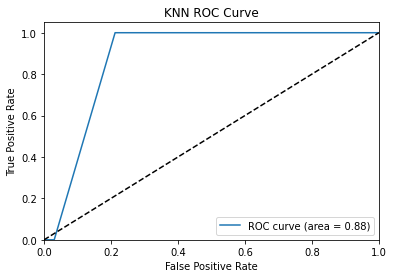

<Figure size 432x288 with 0 Axes>

In [148]:
predictionsknnc=knnc.predict(X_test)

from sklearn.metrics import roc_curve,auc

fpr,tpr,_=roc_curve(y_test,predictionsknnc, pos_label=2)

roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()
resolution_value = 600
plt.savefig("KNN ROC Curve.png", format="png", dpi=resolution_value)

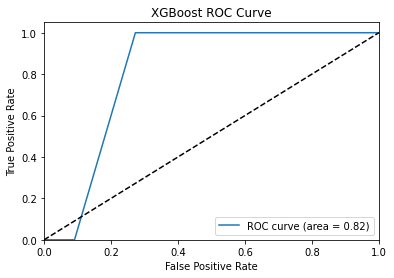

<Figure size 432x288 with 0 Axes>

In [145]:
predictionsxgbc=xgbc.predict(X_test)

from sklearn.metrics import roc_curve,auc

fpr,tpr,_=roc_curve(y_test,predictionsxgbc, pos_label=2)

roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()
resolution_value = 600
plt.savefig("XGBoost ROC Curve.png", format="png", dpi=resolution_value)

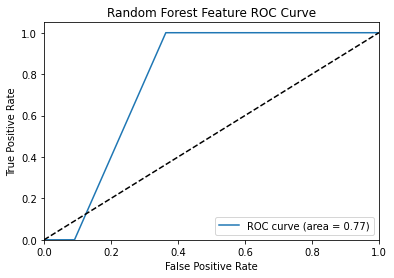

<Figure size 432x288 with 0 Axes>

In [144]:
pred_rf=rfc.predict(X_test)

from sklearn.metrics import roc_curve,auc

fpr,tpr,_=roc_curve(y_test,pred_rf, pos_label=2)

roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Feature ROC Curve')
plt.legend(loc="lower right")
plt.show()
resolution_value = 600
plt.savefig("Random Forest Feature ROC Curve.png", format="png", dpi=resolution_value)


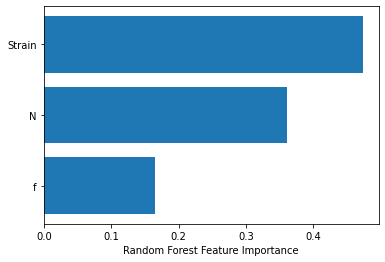

In [143]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rfc, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
resolution_value = 600
plt.savefig("Random Forest Feature Importance.png", format="png", dpi=resolution_value)

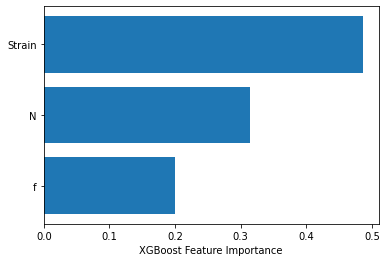

In [140]:
from sklearn.inspection import permutation_importance
perm_importance2 = permutation_importance(xgbc, X_test, y_test)
sorted_idx = perm_importance2.importances_mean.argsort()
plt.barh(df.columns[sorted_idx], xgbc.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")
resolution_value = 600
plt.savefig("XGBoost Feature Importance.png", format="png", dpi=resolution_value)